# INTRO

**Sampling distribution of the mean**

- we can use the random.normal() function frm NumPy to generate a population of values with particular standard deviation 
- generate sampling distribution of the sample mean 
- calculate CI for 95% 
- finally determine the standard error 
- estimate the width of the sampling distribution above, without actually knowing the population distribution 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd

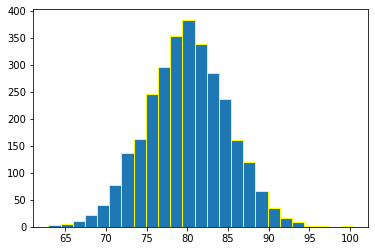

In [5]:
pop_std = 5
sample_size = 10
size = 3000
population = np.random.normal(loc = 80, scale = pop_std, size = size)
population = list(population)
plt.hist(population, bins = 25, edgecolor = "yellow")
plt.show()

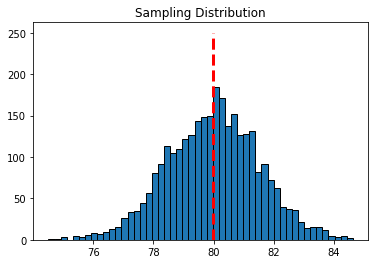

In [6]:
sample_mean = []
for i in range(size):
    samp = random.sample(population, sample_size)
    sample_mean.append(np.mean(samp))
plt.hist(sample_mean, bins = 50, edgecolor = 'black')
plt.title('Sampling Distribution')
plt.vlines(np.mean(sample_mean), 0, 250, lw = 3, linestyles = 'dashed', color = 'red')
plt.show()

**Specifically, the NumPy percentile() function can be used to calculate that 95% of the sample means from the above simulation**

- 95 % of the sample means from the above simulation fall in a range from 46.6 to 100. 

In [7]:
percentiles = np.percentile(sample_mean, [2.5, 97.5])
percentiles

array([76.98049617, 82.96535019])

In [8]:
std_error = np.std(sample_mean) / (sample_size ** 0.5)
std_error

0.4826814331172427

In [9]:
# first needs to multiply the z-score by standard error 
z_score = 1.96
mean_width = z_score * std_error
mean_width

0.9460556089097957

Therefore, there is about a 95% probability that the observed sample mean of 80 is no more than 0.97N  away from the population mean. In other words, there is about a 95% probability that the population mean is between 79 and 81. This is referred to as a 95% confidence interval.

# Statistical Concepts

**Sample Mean and Population Mean**

What is a sample?
- Sample is a subset from entire population.The mean of each sample is called sample mean and is a estimation of the population mean. 
What is the population?
- Represent the entire dataset of observations, for a population the mean is constant. 

In [10]:
#Example 
population_mean = np.mean(population)
print("Population mean: {}".format(population_mean))

Population mean: 79.95608696773748


In [11]:
# Generate samples population 
sample_1 = np.random.choice(population, size = 30, replace = False)
sample_2 = np.random.choice(population, size=30, replace=False)
sample_3 = np.random.choice(population, size=30, replace=False)
sample_4 = np.random.choice(population, size=30, replace=False)
sample_5 = np.random.choice(population, size=30, replace=False)

In [12]:
sample_1_mean = np.mean(sample_1)
sample_2_mean = np.mean(sample_2)
sample_3_mean = np.mean(sample_3)
sample_4_mean = np.mean(sample_4)
sample_5_mean = np.mean(sample_5)

In [13]:
print("Sample 1 Mean: {}".format(sample_1_mean))
print("Sample 2 Mean: {}".format(sample_2_mean))
print("Sample 3 Mean: {}".format(sample_3_mean))
print("Sample 4 Mean: {}".format(sample_4_mean))
print("Sample 5 Mean: {}".format(sample_5_mean))

Sample 1 Mean: 78.82157141946615
Sample 2 Mean: 79.17052600481296
Sample 3 Mean: 80.33565559507625
Sample 4 Mean: 79.08204769418708
Sample 5 Mean: 80.66344214491393


**Central Limit Theorem**

- The Central Limit Theorem states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution. This fact holds especially true for sample sizes over 30.
- An essential component of the **Central Limit Theorem** is that the average of your sample means will be the population mean. In other words, add up the means from all of your samples, find the average and that average will be your actual population mean


In [14]:
# Select increasingly larger samples
extra_small_sample = population[:10]
small_sample = population[:50]
medium_sample = population[:100]
large_sample = population[:500]
extra_large_sample = population[:1000]

In [15]:
# Calculate the mean of those samples
extra_small_sample_mean = np.mean(extra_small_sample)
small_sample_mean = np.mean(small_sample)
medium_sample_mean = np.mean(medium_sample)
large_sample_mean = np.mean(large_sample)
extra_large_sample_mean = np.mean(extra_large_sample)

In [16]:
print("Extra Small Sample Mean: {}".format(extra_small_sample_mean))
print("Small Sample Mean: {}".format(small_sample_mean))
print("Medium Sample Mean: {}".format(medium_sample_mean))
print("Large Sample Mean: {}".format(large_sample_mean))
print("Extra Large Sample Mean: {}".format(extra_large_sample_mean))

print("\nPopulation Mean: {}".format(population_mean))

Extra Small Sample Mean: 80.02104335587059
Small Sample Mean: 80.17244657680247
Medium Sample Mean: 80.04796303746896
Large Sample Mean: 79.49523833682031
Extra Large Sample Mean: 80.00143764429463

Population Mean: 79.95608696773748


**Hypothesis Tests**

- Suppose we want to know if men are more likely to sign up for a given programming class than women. We invite 100 men and 100 women to this class. After one week, 34 women sign up, and 39 men sign up. More men than women signed up, but is this a “real” difference?

- We have taken sample means from two different populations, men and women. We want to know if the difference that we observe in these sample means reflects a difference in the population means. To formally answer this question, we need to re-frame it in terms of probability:

-“What is the probability that men and women have the same level of interest in this class and that the difference we observed is just chance?”

- In other words, “If we gave the same invitation to every person in the world, would more men still sign up?”

- A more formal version is: “What is the probability that the two population means are the same and that the difference we observed in the sample means is just chance?”

- These statements are all ways of expressing a null hypothesis. A null hypothesis is a statement that the observed difference is the result of chance.
- RO: Aceste afirmații sunt toate modalități de exprimare a unei ipoteze nule. O ipoteză nulă este o afirmație conform căreia diferența observată este rezultatul întâmplării.

**Type I Or Type II**

- Type one erro or False Pozitive 
    - Exemplu:
- For example, let’s say you conduct an A/B test for an online store and conclude that interface B is significantly better than interface A at directing traffic to a checkout page. You have rejected the null hypothesis that there is no difference between the two interfaces. If, in reality, your results were due to the groups you happened to pick, and there is actually no significant difference between interface A and interface B in the greater population, you have been the victim of a false positive.

- Type two error or False Negative
    - Exemplu:
- The second kind of error, a Type II error, is failing to find a correlation between things that are actually related. This error is referred to as a “false negative” and occurs when the null hypothesis is accepted even though it is false.

**P-Value**

- A hypothesis test provides a numerical answer, called a p-value, that helps us decide how confident we can be in the result.
- RO:Un test de ipoteză oferă un răspuns numeric, numit valoare p, care ne ajută să decidem cât de încrezători putem fi în rezultat.
- A p-value of 0.05 means that if the null hypothesis is true, there is a 5% chance that an observed sample statistic could have occurred due to random sampling error. For example, in comparing two sample means, a p-value of 0.05 indicates there is a 5% chance that the observed difference in sample means occurred by random chance, even though the population means are equal.
- O valoare p de 0,05 înseamnă că dacă ipoteza nulă este adevărată, există o șansă de 5% ca o statistică a eșantionului observat să se fi produs din cauza unei erori de eșantionare aleatorie.De exemplu, la compararea a două mijloace de eșantionare, o valoare p de 0,05 indică o șansă de 5% ca diferența observată în mijloacele de eșantionare să aibă loc la întâmplare, chiar dacă media populației este egală.

**1 Sample T-Testing(type 1 error)**
- a 1 Sample T Test, which compares a sample mean to a hypothetical population mean.
1. Create null hypothesis 
2. Create alternative hypothesis 
3. Form H0 and Ha
4. Test of result is a p-value, whether of is less than our chosen threeshold (ussually 0.05) we can reject H0 in favor of Ha.
T-distribution is used when have smaller sample size than 30

**Exemplu**
1. Define null and alternative hypotheses 
    - H0 = There is no difference between pop mean and sample mean miu = 100
    - Ha = There is a difference between pop mean and sample mean miu different 100
2. State Alpha
     Alfa = 0.05 
3. Calculate degrees of freedom
    - n - 1 = 30 - 1 = 29 
4. State Decision rule 
    - 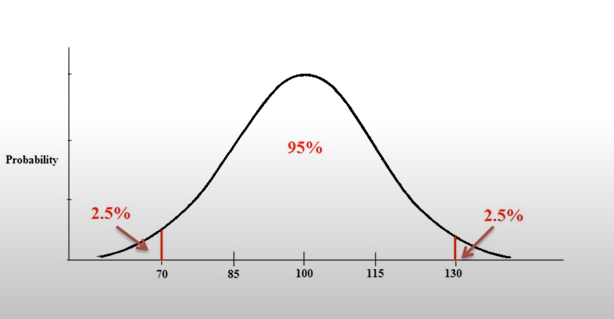
    - open the T-table, select the t value by intersecting degree of freedom 29 and alfa value 0.05, result is 2.0452.
    - if t is less then - 2.0452, or greater than 2.0452, reject the null hypothesis.
5. Calculate tetst statistic
    - t = (sample_mean - pop_mean)/(sample_std/sqrt(n)) = 10.96
6. State results
    - t= 10.96 therefore is greater than 2.0452 
    - Result reject null hypothesis 
7. State Conclusion 
    - Medication significantly affect intelligence, t = 10,96, p < 0.05 

In [17]:
pop_mean = 100
sample_mean = 140 
sample_std = 20
sample_size = 30 

In [18]:
# example of 1 sample T test calculation 
df = pd.read_csv("greenhouse_pollution.csv")
df.head()

,region,anzsic_descriptor,gas,units,magnitude,year,data_val
0,Auckland,Agriculture,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2007,811.63
1,Auckland,Agriculture,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2008,777.95
2,Auckland,Agriculture,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2009,684.00
3,Auckland,Agriculture,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2010,706.56
4,Auckland,Agriculture,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2011,764.30


Ho = there is no difference between population mean and sample mean miu = 1464

Ha = there is a difference between population mean and sample mean miu different 1646

In [19]:
# prepare data 
data = df.data_val
data_mean = np.mean(data)
sample_size = 300

In [20]:
# select randomnly samples 
sample_list = []
for i in range(sample_size):
    sample = np.random.choice(data, size = 50, replace = False)
    sample_list.append(sample)

In [21]:
# create sample mean list 
sample_mean = []
for i in sample_list:
    sample_mean.append(np.mean(i))  

In [22]:
# calculate the p-value
greater_pval = 0
for i in range(len(sample_list)):
    result = ttest_1samp(sample_list[i], data_mean)
    pval = result.pvalue
    if pval < 0.05:
        greater_pval += 1
print("Null hypothesis is True p-value was found less than 0.05 in {} results out of {}.".format(greater_pval, sample_size))

Null hypothesis is True p-value was found less than 0.05 in 21 results out of 300.


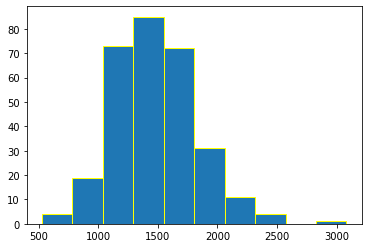

In [23]:
# create a visual representation of the sample distribution of the sample mean 
plt.hist(sample_mean, edgecolor = 'yellow')
plt.show()

In [24]:
result = ttest_1samp(sample, data_mean)
result

Ttest_1sampResult(statistic=0.09887326728689472, pvalue=0.9216422801030014)

**2 Sample T-Test**
- is used to determine if two population means are equal
- suppose that we have build a new site and you would like to know if the new site is more atractive, a sample of 100 visitors who saw the new version spent 28 minutes and another 100 visitors who visited the old variant spent 25 minutes. Are these groups different or is randomnly chance?
- One way of testing whether this difference is significant is by using a 2 Sample T-Test. A 2 Sample T-Test compares two sets of numerical data.
- define the H0 the two observed samples comes from the population with same mean 
- define the Ha the two observed samples comes from populations with different mean 
- ttest_ind function to perform a 2 Sample T-Test. It takes the two samples as inputs and returns the t-statistic and a p-value, which we can use to assess the probability of an observed difference happening by chance if the null hypothesis were true
- compute t-statistic for  two samples t-test formula
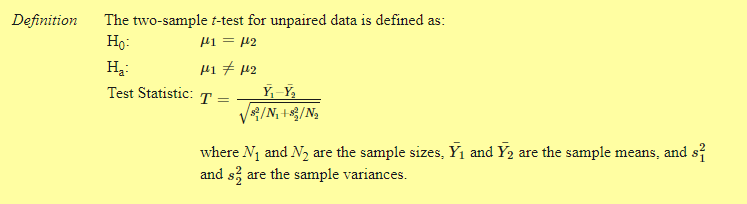

In [25]:
# examples give the yield of corn for two types of fertilizer, fertilizer a and b. 
dataset = [452, 546, 874, 547, 554, 774, 447, 465, 356, 459, 754, 665, 558, 467, 574, 365, 664, 589, 682, 534, 547, 456, 435, 651, 245, 654, 665, 546, 537]
a = dataset[:13]
b = dataset[13 : ]

In [26]:
# calculate mean value 
a_mean = np.mean(a)
b_mean = np.mean(b)
print(a_mean, b_mean)

573.1538461538462 538.1875


Set significance threeshold of = 0.05

In [27]:
a_b_result = ttest_ind(a, b)
a_b_pval = a_b_result.pvalue
print(a_b_pval)
print(a_b_result.statistic)

0.49623097054641063
0.6897605931386662


**Anova**
- wu use anova when we have more than 2 groups of  random variables 
- H0 all the populations means are equal, null hypothesis related to the equality 
- Ha not all the means are the same, at least one is different
- we want to know if the differnces is likely by sampling variation by chance
- we reject the H0 ( if we get a p-value less than 0.05), we can say that we are reasonably confident that at least one pair of populations is significantly different. 

To figure this out, we decided to implement it on smaller group of randomnly selected students from three different classes. We take three different groups of ten randomnly selected students (all of the same age) from three different classrooms. Each class was provided with a different enviroment for students to study. 
- classroom A had constant music being played in the background 
- classroom B had variable music being played 
- classroom C was a regular class without music 
After one month we conducted a test for all three groups and collect their scores 
- https://www.analyticsvidhya.com/blog/2018/01/anova-analysis-of-variance/

In [28]:
# data input 
A = [7,9,5,8,6,8,6,10,7,4]
b = '4362755413'
c = '6135346573'
B = []
C = []
for i in b:
    B.append(int(i))
for i in c:
    C.append(int(i))

In [29]:
# calculate the mean for each group 
A_mean = np.mean(A)
B_mean = np.mean(B)
C_mean = np.mean(C)
grand_mean = (A_mean + B_mean + C_mean) / 3

In [30]:
# sum-of-squares for between-group variability
# the degrees of freedom is the sum of the sample sizes (N) minus the number of samples (k).
df_between = 3 - 1 
ss_between = 10 *(A_mean - grand_mean)**2 + 10 *(B_mean - grand_mean)**2 + 10 *(C_mean - grand_mean)**2
ms_between = ss_between / df_between
ms_between 

27.3

In [31]:
# sum of squares for within-group variability.
ss_within = 0
for i in range(len(A)):
    sum_mean = (A[i] - A_mean)**2 + (B[i] - B_mean)**2 + (C[i] - C_mean)**2
    ss_within += sum_mean
ss_within

90.1

In [32]:
# degrees of freedom 
df_within = 30 -3 
ms_within = ss_within / df_within
ms_within

3.337037037037037

In [33]:
# F = Between group variability / Within group variability
f_statistic = ms_between / ms_within
f_statistic

8.180910099889012

**Assumptions of T-Tests and ANOVA**

- Data analysts in the real world often still perform t-tests or ANOVAs on data that are not normally distributed. This is usually not a problem if sample size is large, but it depends on how non-normal the data is. In general, the bigger the sample size, the safer you are!
- For ANOVA and 2-Sample T-Tests, using datasets with standard deviations that are significantly different from each other will often obscure the differences in group means. That said, there is also a way to run a 2-Sample T-Test without assuming equal standard deviations 

**Tukey's Range Test**

- We can perform a Tukey’s Range Test to determine the difference between datasets.

- If we feed in three datasets, such as the sales at the VeryAnts store locations A, B, and C, Tukey’s Test can tell us which pairs of locations are distinguishable from each other.

- The function to perform Tukey’s Range Test is **pairwise_tukeyhsd**, which is found in **statsmodel**, not scipy. We have to provide the function with one list of all of the data and a list of labels that tell the function which elements of the list are from which set. We also provide the significance level we want, which is usually 0.05.

An investigator wishes to compare the average time to relief of headache pain under three distinct medications, call them drug a, drug b and drug c. Fifteen patients who suffer from chronic headaches are randomnly selected for the investigations, and five subjects are randomnly assigned for treatment. This following data reflect times to relief(in minutes) after taking the asgned drug:

- let's find out which drugs are sigficantly different?
- alfa value is 0.05. 

In [34]:
drug_a = [30, 35, 40, 25, 35]
drug_b = [25, 20, 30, 25, 30]
drug_c = [15, 20, 25, 20, 20]

In [35]:
# calculate the mean 
a_drug_mean = np.mean(drug_a)
b_drug_mean = np.mean(drug_b)
c_drug_mean = np.mean(drug_c)
print(a_drug_mean, b_drug_mean, c_drug_mean )

33.0 26.0 20.0


In [36]:
# calculate standard deviation parameter 
a_drug_std = np.std(drug_a)
b_drug_std = np.std(drug_b)
c_drug_std = np.std(drug_c)
print(a_drug_std, b_drug_std, c_drug_std)

5.0990195135927845 3.7416573867739413 3.1622776601683795


In [37]:
v = np.concatenate([drug_a, drug_b, drug_c])
labels = ['drug_a'] *len(drug_a) + ['drug_b'] *len(drug_b) + ['drug_c'] *len(drug_c)
tukey_result = pairwise_tukeyhsd(v, labels, 0.05)
print(tukey_result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
drug_a drug_b     -7.0 0.0762 -14.6977  0.6977  False
drug_a drug_c    -13.0 0.0019 -20.6977 -5.3023   True
drug_b drug_c     -6.0  0.136 -13.6977  1.6977  False
-----------------------------------------------------


In [38]:
# design a function to calculate the mean 
def calculate_mean(data):
    return np.mean(data)
calculate_mean(drug_a)

33.0

In [39]:
# design a function to automaticly calculate the ss_within 
def ss_within(x, y, z):
    ss_within = 0
    for i in range(len(x)):
        square_sum = (x[i] - calculate_mean(x))**2 + (y[i] - calculate_mean(y))**2 + (z[i] - calculate_mean(z))**2
        ss_within += square_sum
    return ss_within
ss_within = ss_within(drug_a, drug_b, drug_c)
ss_within

250.0

In [40]:
# create a list of means 
datasets = [drug_a, drug_b, drug_c]
def mean_list(data):
    mean_list = []
    for i in data:
        mean = calculate_mean(i)
        mean_list.append(mean)
    return mean_list
mean_list = mean_list(datasets)  
mean_list

[33.0, 26.0, 20.0]

In [41]:
n_means = len(mean_list)
df_within = 15 - n_means
ms_within = ss_within / df_within
group_individual = 5
q_k = (max(mean_list) - min(mean_list)) / (np.sqrt(ms_within/group_individual))
q_k

6.3686733312362644

**Binominal test**
- Let’s imagine that we are analyzing the percentage of customers who make a purchase after visiting a website. 1000 customers visited the site this month, and 58 of them made a purchase. The marketing department reports that historical data suggests about 72 of every 1000 visitors make a purchase. Thus, they estimate that the probability of any particular customer making a purchase is 7.2%. We would like to know if this month’s number, 58 purchases, is significantly different from normal or a reasonable fluctuation due to random chance.

- In previous exercises, we collected samples of numerical information (eg. order price) and then used the mean and standard deviation of those samples to make comparisons. In contrast, we now have a sample where each unit (a visitor) falls into one of two discrete categories:

        “made a purchase”
        “did not make a purchase”

- Instead of comparing sample means, we want to compare the percent in the “made a purchase” category to some expectation. This can be done with a Binomial Test.The binomial distribution describes the number of expected “successes” in an experiment with some number of “trials”. In this case, our experiment consists of 1000 people visiting the site.
- SciPy has a function called binom_test(), which performs a Binomial Test for you.
- binom_test() requires three inputs, the number of observed successes, the number of total trials, and an expected probability of success. For example, with 1000 coin flips of a fair coin, we would expect a “success rate” (the rate of getting heads), to be 0.5, and the number of trials to be 1000. Let’s imagine we get 525 heads. Is the coin weighted? This function call would look like:

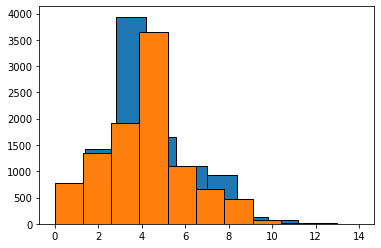

In [58]:
from scipy.stats import binom
p = 83/1666
n = 83
distr0 = np.random.binomial(n, p, size = 10000)
distr1 = binom.rvs(n=83,p=p,loc=0,size=10000)
plt.hist(distr0, edgecolor = 'black')
plt.hist(distr1, edgecolor = 'black')
plt.show()

In [57]:
from scipy.stats import binom_test
num_visits = len(df)
p_clicks_099 = (1000 / 0.99) / num_visits
p_clicks_199 = (1000 / 1.99) / num_visits
p_clicks_499 = (1000 / 4.99) / num_visits
pvalueA = binom_test(316, 1666, p_clicks_099)
print(pvalueA)
pvalueB = binom_test(183, 1666, p_clicks_199)
print(pvalueB)
pvalueC = binom_test(83, 1666, p_clicks_499)
print(pvalueC)

2.338790684195727e-37
3.66128760933576e-10
0.008606696889221319


**Chi Square Test**
- In the last exercise, we looked at data where customers visited a website and either made a purchase or did not make a purchase. What if we also wanted to understand if the probability of making a purchase depends on some other categorical variable, like gender? If we want to understand whether the outcomes of two categorical variables are associated, we should use a Chi Square test. It is useful in situations like:

- An A/B test where half of users were shown a green submit button and the other half were shown a purple submit button. Was one group more likely to click the submit button?
People under and over age 40 were given a survey asking “Which of the following three products is your favorite?” Did these age groups have significantly different preferences?
In SciPy, you can use the function chi2_contingency to perform a Chi Square test.

The input to chi2_contingency is a contingency table where:

- The columns are each a different condition, such as Interface A vs. Interface B
- The rows represent different outcomes, like “Clicked a Link” vs. “Didn’t Click”

Link:
    https://byjus.com/maths/chi-square-test/

In [ ]:
from scipy.stats import chi2_contingency 
contingency = [[316, 1350], [183, 1483], [83, 1583]]
chi2, p, dof, expctd = chi2_contingency(contingency)
chi2, p

In [ ]:
import math
n = 32
k = 5
p = 5/32
x = (math.factorial(n)/(math.factorial(n - k)* math.factorial(k))) * p**n * (1 - p)**(n-k)
x

In [ ]:
# Introduction to hypothesis One sample T-test